In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [131]:
pd.concat([path_1, path_2], axis=1).corr()

,0,1
0,1.000000,0.902028
1,0.902028,1.000000


# Machine Learning

- **Norm**: Answer the question how big is a vector; Norm of a vector: ${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}.}$ `numpy.linalg.norm(x)`
- **Dot Product**: Algebraic definition: $x⋅y≡x′y:=∑_{i=1}^nx_i∗y_i$
- **Dot Product**: Geometric definition: $x⋅y:=∥x∥∗∥y∥∗\cos(θ)$ (where $θ$ is the angle between the two vectors)
- NumPy: `np.dot(x,y)`
- **unit vector**: $\frac{x}{||x||}$
- **loss function** is some way for us to value how far is our model from the data that we have. We first define an "error" or "Loss". For example in Linear Regression the "error" is the Euclidean distance between the predicted and the observed value:

$$
L(x,y;Θ)=∑_{n=1}^i|\hat{y}−y|=∑_{n=1}^i|θ_1x+θ_2−y|
$$

- **Chain rule**

$$
\frac{∂y}{∂x}=\frac{∂y}{∂z}∗ \frac{∂z}{∂x}
$$



## Linear Classifier

Training data can be graphically depicted on a (hyper)plane. **Classifiers** are **mappings** that take **feature vectors as input** and produce **labels as output**. A common kind of classifier is the **linear classifier**, which linearly divides space(the (hyper)plane where training data lies) into two. Given a point $x$ in the space, the classifier $h$ outputs $h(x)=1$ or $h(x)=−1$, depending on where the point x exists in among the two linearly divided spaces.

We saw in the lecture above that for a linear classifier $h, h(x;θ)=sign(θ⋅x)$, i.e. the sign of the dot product of $θ$ and $x$ (note that there are multiple parameter vectors that define the same classifier; note also that equidistant points on the same side of the classifier are classified with the same "strength"). For linearly separable data, a linear classifier can perfectly separate the data.

#### Perceptron Algorithm Definition

**Perceptron** $\displaystyle \left(\big \{ (x^{(i)}, y^{(i)}), i=1,...,n\big \} , T \right):$:

  initialize $θ=0$ (vector); $\theta_0 =0$ (scalar)<br>
    for $t=1,...,T$ do<br>    
      for $i=1,...,n$ do<br>
        if $y^{(i)}(θ⋅x^{(i)} + \theta_0)≤0$ then<br>        
        update $θ=θ+y^{(i)}x^{(i)}$<br>
        update $θ_0=θ_0+y^{(i)}$

When a mistake is spotted, the updated values of $θ$ and $θ_0$ provide always a better prediction. To see why, let's calculate the difference between the update value of $\theta$ times the label and the updated value times the label, i.e. $y^{(i)}(θ⋅x^{(i)} + \theta_0)≤0$.

$$
y^{(i)}((\theta +y^{(i)} x^{(i)}) \cdot x^{(i)} + \theta _0 + y^{(i)}) - y^{(i)}(\theta \cdot x^{(i)} + \theta _0) = \\ (y^{(i)})^2 \| x^{(i)}\| ^2 + (y^{(i)})^2 =\\ (y^{(i)})^2(\| x^{(i)}\| ^2 + 1)) > 0
$$

([Dot product of a vector with itself is equal to the square ot the norm](https://proofwiki.org/wiki/Dot_Product_of_Vector_with_Itself))

___

**Novikoff Theorem**: there exists $\theta^*$  such that **a)** $\frac{y^{(i)}(\theta ^* x^{(i)})}{\| \theta ^*\| } \geq \gamma$  for all  $i=1,⋯,n$ and some $\gamma > 0$ **b)** All the examples are bounded  $\| x^{(i)}\|  \leq R, i=1,\cdots ,n$, then the number $k$ of updates made by the perceptron algorithm is bounded by $\frac{R^2}{\gamma ^2}$.

**NOTE**:<br>
- **For linearly separable dataset, the algorithm will converge!**
- **if the dataset is not linearly separable, the algorithm never converges!**

## SVM (Support Vector Machines)

*Objective function = loss (how examples fit) + regularization (preference for large margin boundaries)*

The magnitude of $\theta$, $||\theta||$, describes the "sensitivity" of the classifier to changes in $x$: the smaller it is, the less sensitive the classifier is to small changes in $x$. The **decision boundary** is the set of points x which satisfy $θ⋅x+θ_0=0.$ The **Margin Boundary** is the set of points x which satisfy $\theta x+\theta_0=±1$.  So, the distance from the decision boundary to the margin boundary is $\frac{1}{∣∣\theta∣∣}$ (**maximizing the boundary then means minimizing the $∣∣\theta∣∣$**). As we increase $∣∣θ∣∣$, $\frac{1}{∣∣θ∣∣}$ decreases. The loss for the model is:
$$
J(\theta , \theta _0) = \frac{1}{n} \sum _{i=1}^{n} \text {Loss}_ h (y^{(i)} (\theta \cdot x^{(i)} + \theta _0 )) + \frac{\lambda }{2} \mid \mid \theta \mid \mid ^2.
$$
The first part represent the **Hinge Loss**, defined as:
$$
\max \Big( 0, 1 - (y^{(i)} (\theta \cdot x^{(i)} + \theta _0 )) \Big)
$$
It spots the points not correctly classified or within the margin boundary. The second part represent the width of the margins; Through gradient descent. In other words, we will

$loss(z) = 0$: if $z > 1$ if (the point is outside the boundary, on the right direction) and
$loss(z) = 0$: if $1 - z$  if $z < 1$ if (either the point is well classified, but inside the boundary, or it is even misclassified).

- Start  $θ$  at an arbitrary location: $θ←θstart$
- Update  $θ$  repeatedly with  $θ←θ−η \frac{∂J(θ,θ0)}{∂θ}$  until $θ$  does not change significantly

The training objective for the Support Vector Machine (with margin loss) can be seen as optimizing a balance between the average hinge loss over the examples and a regularization term that tries to keep the parameters small (increase the margin). This balance is set by the regularization parameter $λ>0$ (*Note* - $\theta$ is be column vector, and $\hat{y}=θ^⊤x$)$

**When the hinge loss is $\geq 0$, the total loss is minimized by: $\hat{\theta } = \frac{1}{\lambda } y x$ <br>**
**When the hinge loss is $\leq 0$, the total loss is minimized by: $\hat{\theta } = ?$**
___

Passive Aggressive Algo: 
The new update, when $\text {Loss}_ h(y \theta ^{(k+1)}\cdot x)>0$, should be $\theta = \displaystyle  \theta ^{(k)} + \frac{1}{\lambda }yx$, where $\eta = 1/\lambda$

Consider a sequence of  $n$-dimensional data points, $x^{(1)},x^{(2)},...$, and a sequence of $m$-dimensional feature vectors,  $z^{(1)},z^{(2)},...$, extracted from the  $x$'s by a linear transformation,  $z^{(i)}=Ax^{(i)}$ . If $m$ is much smaller than $n$, you might expect that it would be easier to learn in the lower dimensional feature space than in the original data space.

In general, **the accuracy in $z$-space (for the seen data) is always bounded by the accuracy in the $x$ space**, as we can always construct a classifier in $x$ space that corresponds to a classifier in $z$ space (but not vice versa).


### Linear Regression

Linear regression tries to estimate a predictor $f$ which is a linear function of the feature vectors. i.e. $f(x)=∑_{i=1}^dθ_ix_i+θ_0$. In carrying out this estimation there can be two kind of mistakes:

- Structural Mistakes (Non Linear relation $\to$ $f(x)$)
- Estimation mistake (too many parameters or too low data)

In any case, the **objective** is to minimize the empirical risk; $R_n$ is defined as

$$
\begin{equation} R_ n(\theta ) = \frac{1}{n} \sum _{t=1}^{n} \text {Loss}(y^{(t)} - \theta \cdot x^{(t)})\,. \end{equation}
$$

If we define the loss with the **mean square** criterion, the risk becomes:

$$
\begin{equation} R_ n(\theta ) = \frac{1}{n} \sum _{t=1}^{n} \frac{(y^{(t)} - \theta \cdot x^{(t)})^2}{2}\,. \tag{1}\end{equation}
$$

In order to minimize it that, we can use two different approaches (**Learning Algorithm**); 1 regards a closed-form solution, the other one is gradient-descend:

**Gradient descend**

In regular gradient descent, you run through your entire training set, average the computed gradient per sample, and update the parameters with this averaged gradient. This is guaranteed to monotonically improve the objective function, but it is slow (n calculations for 1 update). Often you instead perform stochastic gradient descent, or more specifically minibatch gradient descent, where you update after only averaging the gradient across $k \dot n$ samples (a "minibatch").

We learned in lectures that, in general, gradient descent works by moving the parameter in the opposite direction of the slope/gradient. This is accomplished in the update by subtracting the slope/gradient multiplied by the learning rate, $η$ from the current $θ$. The update is 

$$
θ_{new}=θ_{old}−η∗∇θ
$$

in order to *nudge* the parameter down the error hill; $∇θ$ is the gradient, defined as  $∇θ=−(y_t−θ∗x_t)∗x_t$. So the update becomes:

$$
θ_{new}=θ_{old}+η(y_t−θ∗x_t)∗x_t
$$


To make the optimization more robust, we want to add a **regularization** term (**Ridge Regression**). 

$$
J_{n, \lambda } (\theta , \theta _0) = \frac{1}{n} \sum _{t=1}^{n} \frac{(y^{(t)} - \theta \cdot x^{(t)}-\theta _0)^2}{2} + \frac{\lambda }{2} \left\|  \theta  \right\| ^2
$$

The new update becomes:

$$
xθ_{new}=θ_{old}-(\lambda \theta- η(y_t−θ∗x_t)∗x_t)
$$

In this way, **we are pushed to keep $\theta$ small**; i.e. we will not see huge negative and positive coefficient (especially when we have *collinearity*)

### Nonlinear Classification

[link on kernels](https://www.quora.com/What-are-kernels-in-machine-learning-and-SVM-and-why-do-we-need-them/answer/Lili-Jiang?srid=oOgT)

We can use linear classifiers to make non-linear predictions. The easiest way to do this is to first map all the examples $\in R^d$ to different feature vectors $ϕ(x)\in R^p$ where typically $p$ is much larger than $d$. We would then simply use a linear classifier on the new (higher dimensional) feature vectors, pretending that they were the original input vectors. As a result, all the linear classifiers we have learned remain applicable, yet produce non-linear classifiers in the original coordinates.

**The aim is to find some transformation of the original vector $x$ that maps it in a different dimension so that the data become separable** 


We can get more and more powerful classifiers by adding linearly independent features, $x^²$, $x^3$... This functions are linearly independent, so the original coordinates always provide something above and beyond what were in the previous ones. Note that when $x$ is already multidimensional, would result in dimensions exploding. Once we have the new feature vector we can make non-linear classification or regression in the original data making a linear classification or regression in the new feature space:

- Classification: $h(x;θ,θ_0)=\text{sign}(θ⋅ϕ(θ)+θ_0)$
- Regression: $f(x;θ,θ_0)=θ⋅ϕ(θ)+θ_0$

More feature we add (e.g. more polynomial grades we add), better we fit the data. The key question now is **when is time to stop adding features?** We can use the validation test to test which is the polynomial form that, trained on the training set, respond better in the validation set. At the extreme, you hold out each of the training example in turn in a procedure called **leave one out cross validation**. So you take a single training sample, you remove it from the training set, retrain the method, and then test how well you would predict that particular holdout example, and do that for each training example in turn. And then you average the results. While very powerful, this mapping could dimensionally explode quickly. Let's our original $x∈R^d$. Then a feature transformation: - quadratic (order 2 polynomial): would involve $d+≈d^2$ dimensions (the original dimensions plus all the cross products) - cubic (order 3 polynomial): would involve $d+≈d^2+≈d^3$ dimensions (the exact number of terms of a feature transformation of order $p$ of a vector of d dimensions is:
$$
\sum_{i=1}^p {d+i-1 \choose i}
$$

#### Kernels: Computational Efficiency

>  **Kernel Definition**: the kernel is an inner product of an arbitrary function of its arguments. $K(x,x^′)=⟨ϕ(x),ϕ(x^′)⟩$; an **inner product** associates each pair of vectors in the space with a scalar  quantity known as the inner product of the vectors. 

The idea is that you can take inner products between high dimensional feature vectors and evaluate that inner product very cheaply. And then, we can turn our algorithms into operating only in terms of these inner products. We define the kernel function of two feature vectors (two different data pairs) applied to a a given $ϕ$ transformation as the dot product of the transformed feature vectors of the two data:

$$
k(x,x^′;ϕ)∈R^+=ϕ(x)⋅ϕ(x^′)
$$

We can hence think of the kernel function as a kind of similarity measure, how similar the $x$ example is to the $x^′$ one. Note also that being the dot product symmetric and positive, kernel functions are in turn symmetric and positive. For example let's take $x$ and $x^′$ to be two dimensional feature vectors and the feature transformation $ϕ(x)$ defined as 

$$
ϕ(x)=[x_1,x_2,x_1^2,\sqrt2x_1x_2,x_2^2]\\
ϕ(x^′) = [x_1^\prime,x_2^\prime,{x_1^\prime}^2, \sqrt2x_1^\prime x_2^\prime,{x_2^\prime}^2]
$$

This particular ϕ transformation allows to compute the kernel function very cheaply and having very few dimensions:

$$
k(x,x′;ϕ)=ϕ(x)⋅ϕ(x′)=\\= \displaystyle {x_1}{x_1^\prime } + {x_2}{x_2^\prime } + {x_1}^2{x_1^\prime }^2 + 2{x_1}{x_1^\prime }{x_2}{x_2^\prime } + {x_2}^2{x_2^\prime }^2=\\= \displaystyle \left({x_1}{x_1^\prime } + {x_2}{x_2^\prime }\right)+ \left({x_1}{x_1^\prime } + {x_2}{x_2^\prime }\right)^2=\\= \displaystyle x \cdot x^\prime + (x \cdot x^\prime )^2
$$

Note that even if the transformed feature vectors have 5 dimensions, the kernel function return a scalar. In general, for this kind of feature transformation function $ϕ$, the kernel function evaluates as 

$$
k(x,x′;ϕ)=ϕ(x)⋅ϕ(x^′)=(1+x⋅x^′)^p
$$

where $p$ is the order of the polynomial transformation $ϕ$. However, it is only for *some* $ϕ$ for which the evaluation of the kernel function becomes so nice! As soon we can prove that a particular kernel function can be expressed as the dot product of two particular feature transformations (for those interested the *Mercer’s theorem* stated in [these notes](https://courses.cs.washington.edu/courses/cse546/16au/slides/notes10_kernels.pdf)) the kernel function is *valid* and we don't actually need to construct the transformed feature vector (the output of $ϕ$). The task will be to turn a linear method that previously operated on $ϕ(x)$, like $\text{sign}(θ⋅ϕ(x)+θ_0)$ to an inter-classifier that only depends on those inner products, that operates in terms of kernels.


#### The Kernel Perceptron Algorithm

Let's show how we can use the kernel function in place of the feature vectors in the perceptron algorithm.

Recall that the perceptron algorithm (**written in PRIMAL form**):

```python
θ = 0                		# initialisation
for t in 1:T:
	for i in 1:n>
		if yⁱ θ⋅𝛷(xⁱ) ≦ 0   # checking if sign is the same
      	θ = θ + yⁱ𝛷(xⁱ)   	 # update θ if mistake
```

Which is the final value of the parameter $θ$ resulting from such updates ? We can write it as

$$
\theta^∗=∑_{n=1}^{j}α^{(j)}y^{(j)}ϕ(x^{(j)})
$$

where $α$ is the vector of number of mistakes (and hence updates) underwent for each data pair (so $α^{(j)}$ is the (scalar) number of errors occurred with the $j$-th data pair and can also be interpreted as the relative importance of the $j$-th training example to the final predictor). When we want to make a prediction of a data pair $(x^{(i)},y^{(i)})$ using the resulting parameter value $θ^∗$ (that is the "optimal" parameter the perceptron algorithm can give us), we take an inner product with that:

$$
\text{prediction}^{(i)}=θ^∗⋅ϕ(x(i))
$$

We can rewrite the above equation as :

$$
\theta^* \cdot \phi(x^{(i)}) = [\sum_{j=1}^n \alpha^{(j)} y^{(j)} \phi(x^{(j)})] \cdot \phi(x^{(i)})\\~~=  \sum_{j=1}^n [\alpha^{(j)} y^{(j)} \phi(x^{(j)}) \cdot \phi(x^{(i)})]\\~~=\sum_{j=1}^n \alpha^{(j)} y^{(j)}k(x^{(j)},x^{(i)})
$$

But this means we can now express success or errors in terms of the $α$ vector and a valid **kernel function** (cheap to compute!). An error on the data pair $(x^{(i)},Y^{(i)})$ can then be expressed as $y^{(i)} * \sum_{j=1}^n \alpha^{(j)} y^{(j)}k(x^{(j)},x^{(i)})$. We can then base our perceptron algorithm on this check, where we start with initiating the error vector $α$ to zero, and we run through the data set checking for errors and, if found, updating the corresponding error term. In practice, our endogenous variable to minimize the errors is no longer directly $\theta$, but became the $α$ vector, that as said implicitly gives the contribution of each data pair to the $θ$ parameter. The perceptron algorithm becomes hence the **kernel perceptron algorithm**:

(**written in DUAL form**)

**Kernel Perceptron** $\displaystyle \left(\big \{ (x^{(i)}, y^{(i)}), i=1,...,n, T \big \} \right)$<br>
  initialize $α_1,...,α_n$ to some values;<br>
  for $t=1,...,T$<br>
    	for $i=1,...,n$<br>
      	if (*Mistake Condition Expressed* in $α_j$)  \# checking **if** prediction is right<br>
        Update $α_j$ appropriately  **# update $α_{j}$ if mistake**

Where the mistake condition expressed in $\alpha_j$ is $y^{(i)}\sum _{j=1}^{n} \alpha _ j y^{(j)} K(x^{j},x^{i}) \leq 0$ and the update condition is $\alpha_j = \alpha_j +1$. **In this case, in order to update, you only use the kernel function, and increment $\alpha$ accordingly**.

#### Kernel Composition Rules

Now instead of directly constructing feature vectors by adding coordinates and then taking it in the product and seeing how it collapses into a kernel, we can construct kernels directly from simpler kernels by made of the following **kernel composition rules**:

1. $K(x,x^\prime) = 1$ is a valid kernel whose feature representation is $\phi(x) = 1$;
2. Given a function $f: \mathbb{R}^d \to \mathbb{R}$ and a valid kernel function $K(x,x^\prime)$ whose feature representation is $\phi(x)$, then $\tilde K(x,x^\prime)=f(x)K(x,x^\prime)f(x^\prime)$ is also a valid kernel whose feature representation is $\tilde \phi(x) = f(x)\phi(x)$
3. Given $K_a(x,x^\prime)$ and $K_b(x,x^\prime)$ being two valid kernels whose feature representations are respectively $\phi_a(x)$ and $\phi_b(x)$, then $K(x,x^\prime)=K_a(x,x^\prime)+K_b(x,x^\prime)$ is also a valid kernel whose feature representation is $\phi(x) = \array{\phi_a(x)\\phi_b(x)}$
4. Given $K_a(x,x^\prime)$ and $K_b(x,x^\prime)$ being two valid kernels whose feature representations are respectively $\phi_a(x) \in \mathbb{R}^A$ and $\phi_b(x) \in \mathbb{R}^B$, then $K(x,x^\prime)=K_a(x,x^\prime) * K_b(x,x^\prime)$ is also a valid kernel whose feature representation is $\phi(x) = \array{\phi_{a,1}(x)* \phi_{b,1}(x)\\phi_{a,1}(x)* \phi_{b,2}(x)\ \phi_{a,1}(x)* \phi_{b,...}(x)\ \phi_{a,1}(x)* \phi_{b,B}(x)\ \phi_{a,2}(x)* \phi_{b,1}(x)\ \phi_{a,...}(x)* \phi_{b,...}(x)\ \phi_{a,A}(x)* \phi_{b,B}(x)\}$ (see [this lecture notes](https://people.cs.umass.edu/~domke/courses/sml2011/07kernels.pdf) for a proof)

Armed with these rules we can build up pretty complex kernels starting from simpler ones.

For example let's start with the identity function as $\phi$, i.e. $\phi_a(x) = x$. Such feature function results in a kernel $K(x,x^\prime;\phi_a) = K_a(x,x^\prime) = (x \cdot x^\prime)$ (this is known as the **linear kernel**). We can now add to it a squared term to form a new kernel, that by virtue of rules (3) and (4) above is still a valid kernel:

$K(x,x^\prime) = K_a(x,x^\prime) + K_a(x,x^\prime)* K_a(x,x^\prime) = (x \cdot x^\prime) + (x \cdot x^\prime)^2$

#### The Radial Basis Kernel

We can use kernel functions, and have them in term of simply, cheap-to-evaluate functions, even when the underlying feature representation would have infinite dimensions and would be hence impossible to explicitly construct.

One example is the so called **radial basis kernel**:
$$
K(x,x^\prime) = e^{-\frac{1}{2} ||x-x^\prime||^2}
$$

It [can be proved](http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf) that suck kernel is indeed a valid kernel and its corresponding feature representation $\phi(x) \in \mathbb{R}^\infty$, i.e. involves polynomial features up to an infinite order. The radial basis kernel look like a Gaussian (without the normalization term).

The above picture shows the contour lines of the radial basis kernel when we keep fixed $x$ (in 2 dimensions) and we let $x^\prime$ to move away from it: the value of the kernel then reduces in a shape that in 3-d would resemble the classical bell shape of the Gaussian curve. We could even parametrize the radial basis kernel replacing the fixed $1/2$ term with a parameter $\gamma$ that would determine the width of the bell-shaped curve (the larger the value of $\gamma$ the narrower will be the bell, i.e. small values of $\gamma$ yield wide bells).

Because the feature has infinite dimensions, the radial basis kernel has infinite expressive power and can correctly classify any training test.

The linear decision boundary in the infinite dimensional space is given by the set ${x: \sum_{j=1}n \alpha^{(j)} y^{(j)} k(x^{(j)},x) = 0 }$ and corresponds to a (possibly) non-linear boundary in the original feature vector space.

The more difficult task it is, the more iterations before this kernel perception (with the radial basis kernel) will find the separating solution, but it always will in a finite number of times. This is by contrast with the "normal" perceptron algorithm that when the set is not separable would continue to run at the infinite, changing its parameters unless it is stopped at a certain arbitrary point.

#### Other non-linear classifiers

We have seen as we can have nonlinear classifiers extending to higher dimensional space and eventually using kernel methods to collapse the calculations and **operate only *implicitly* in those high dimension spaces**. There are other ways to get nonlinear classifiers.

**Decision trees** make classification operating sequentially on the various dimensions and making first a separation on the first dimension and then, in a subsequent step, on the second dimension and so on. And you can "learn" these trees incrementally. To make these decision trees more robust, **random forest classifiers**, adds two type of randomness: 1) in randomly choosing the dimension on which to operate the cut and 2) randomly selecting the single example on which operate from the data set (with replacement) and then just average the predictions obtained from these trees.



___

### Recommender Systems

#### Problem definition

We keep as example across the lecture the recommendation of movies. We start with a $(n,m)$ matrix $Y$ of preferences for user $a = 1,...,n$ of movie $i = 1,...,m$. While there are many ways to store preferences, we will use a real number. The goal is to base the prediction on the prior choices of the users, considering that this $Y$ matrix could be very sparse (e.g. out of 18000 films, each individual ranked very few of them!), i.e. we want to fill these "empty spaces" of the matrix. Why not to use classification/regression based on feature vectors as learned in Lectures 1? For two reasons:

1. Deciding which feature to use or extracting them from data could be hard/infeasible
2. Often we have little data about a single users preferences, while to make a recommendation based on its own previous choices we would need lot of data.

The "trick" is then to "borrow" preferences from the other users and trying to measure how much a single user is closer to the other ones in our dataset.

#### K-Nearest Neighbor (KNN) Method

The number $K$ here means, how big should be your advisory pool on how many neighbors you want to look at. And this can be one of the hyperparameters of the algorithm. We look at the $k$ closest users that did score the element I am interested to, look at their score for it, and average their score.

$$
\hat Y_{a,i} = \frac{\sum_{b \in KNN(a,i;K)} Y_{b,i}}{K}
$$
where $KNN(a,i;K)$ is the set of K users close to user a that have a score for item $i$. But how do I define this similarity? We can use any method to define similarity between vectors, like cosine similarity ($\cos \theta = \frac{x_ a\cdot x_ b}{\left| x_ a \right| \left| x_ b \right| }$) or Euclidean distance ($\left| x_ a-x_ b \right|$).

We can make the algorithm a bit more sophisticated by weighting the neighbor scores to the level of similarity rather than just take their unweighted average:

$$
\widehat{Y}_{ai} = \displaystyle \frac{\displaystyle \sum _{b \in \text {KNN}(a)} \text {sim}(a,b) Y_{bi}}{\displaystyle \sum _{b \in \text {KNN}(a)} \text {sim}(a,b)}.
$$
where $sim(a,b)$ is some similarity measure between users $a$ and $b$. There has been many improvements that has been added to this kind of algorithm, like adjusting for the different "average" score that each user gives to the items (i.e. they compare the deviations from user's averages rather than the raw score itself). Still they are very far from today's methods. The problem of KNN is that it doesn't enable us to detect the hidden structures that is there in the data, which is that users may be similar to some pool of other users in one dimension, but similar to some other set of users in a different dimension. on top, this method depends heavily on the *choice of the similarity measure*.

#### Collaborative Filtering: the Naïve Approach

Let's start with a naïve approach where we just try to apply the same method we used in regression to this problem, i.e. minimize a function $J$ made of a distance between the observed score in the matrix and the estimated one and a regularization term. For now, we treat each individual score **independently**, and this will be the reason for which (we will see) this method **will not work**.

So, we have our (sparse) matrix $Y$ and we want to find a dense matrix $X$ that is able to replicate at best the observed points of $Y_{a,i}$ when these are available, and fill the missing ones when $Y_{a,i} = missing$. Let's first define as $D$ the set of points for which a score in $Y$ is given: $D = {(a,i) | Y_{a,i} \neq \text{missing}}$. The $J$ function then takes any possible $X$ matrix and minimize the distance between the points in the $D$ set less a regularization parameter (we keep the individual scores to zero unless we have strong belief to move them from such state):

$$
J(X;Y,\lambda) = \frac{\sum_{(a,i) \in D} (Y_{a,i} - X_{a,i})^2}{2} + \frac{\lambda}{2}\sum_{(a,i)} X_{a,i}^2
$$
To find the optimal $X_{a,i}^* ~$ that minimize the FOC $(\partial X_{a,i} / \partial Y_{a,i}) = 0$ we have to distinguish if $(a,i)$ is in $D$ or not:

- $(a,i) \in D$: $X_{a,i}^* = \frac{Y_(a,i)}{1+\lambda}$
- $(a,i) \notin D$: $X_{a,i}^* = 0$

Clearly this result doesn't make sense: for data we already know we obtain a bad estimation (as worst as we increase lambda) and for unknown scores we are left with zeros.

#### Collaborative Filtering with Matrix Factorization

What we need to do is to actually relate scores together instead of considering them independently. The idea is then to constrain the matrix $X$ to have a lower rank, as rank captures how much independence is present between the entries of the matrix.

At one extreme, constraining the matrix to be rank 1, would means that we could factorize the matrix $X$ as just the matrix product of two single vectors, one defining a sort of general sentiment about the items for each user ($u$), and the other one ($v$) representing the average sentiment for a given item, i.e. $X=uv^T$.

But representing users and items with just a single number takes us back to the KNN problem of not being able to distinguish the possible multiple groups hidden in each user or in each item. We could then decide to divide the users and/or the items in respectively $(n,2) U$ and $(2,m) V^T$ matrices and constrain our X matrix to be a product of these two matrices (hence with rank 2 in this case): $X=UV^T$

The exact numbers $K$ of vectors to use in the user/items factorization matrices (i.e. the rank of X) is then a hyperparameter that can be selected using the validation set.

#### Alternating Minimization

Using rank 1, we can adapt the $J$ function to take the two vectors $u$ and $v$ instead of the whole $X$ matrix, and our objective becomes to found their elements that minimize such function:

$$
J(\mathbf{u},\mathbf{v}; Y, \lambda) = \frac{\sum_{a,i \in D} (Y_{a,i} - u_a * v_i)^2}{2} + \frac{\lambda}{2}\sum_a^n u_a^2 + \frac{\lambda}{2}\sum_i^m v_i^2
$$
How do we minimize $J$? We can take an **iterative approach** where we start by randomly sampling values for one of the vector and minimize for the other vector (by setting the derivatives with respect on its elements equal to zero), then fix this second vector and going minimize for the first one, etc., until the value of the function $J$ doesn't move behind a certain threshold, in an alternating minimization exercise that will guarantee us to find a local minima (but not a global one!).

Note also that when we minimize for the individual component of one of the two vectors, we obtain derivatives with respect to the individual vector elements that are independent, so the first order condition can be expressed each time in terms of a single variable.

#### Numerical example

Let's consider a value of $\lambda$ equal to $1$ and the following score dataset:

$Y = \begin{bmatrix}5 & ? & 7 \\ 1 & 2 & ?\end{bmatrix}$

and let start out minimization algorithm with $v = [2,7,8]$

L becomes:

$$
J(\mathbf{u}; \mathbf{v}, Y, \lambda) = \frac{(5-2u_1)^2+(7_8u-1)^2+(1-2u_2)^2+(2-7u_2)^2}{2}+\frac{u_1^2+u_2^2}{2}+\frac{2^2+7^2+8^2}{2}
$$
From where, setting $\partial L/\partial u_1 = 0$ and $\partial L/\partial u_2 = 0$ we can retrieve the minimizing values of $(u_1,u_2)$ as 22/23 and 8/27. We can now compute $J(\mathbf{v}; \mathbf{u}, Y, \lambda)$ with these values of $u$ to retrieve the minimizing values of $v$ and so on.

___

### Neural Networks

Neural networks are, in a way, stacks of nonlinear "classifier" units built on top of each other. Each "neuron"/unit of a neural network takes as input a linear combination of the outputs of the layer behind it, performs some nonlinearity on this linear combination, and emits the result as an output. In a way, each layer forms a new feature mapping (of possibly different dimension) based on the previous layer A neural network unit computes a non-linear weighted combination of its input:

$$
\displaystyle  f(z)\quad \text {where } z= w_0 + \sum _{i=1}^ d x_ i w_ i \\	 f(z)\quad \text {where }  z = w_0+x⋅w,
$$

where $x=[x_1,…,x_d]$ and $w=[w_1,…,w_d]^T$ and where $w_i$ are numbers called **weights**, $z$ is a number and is the weighted sum of the inputs $x_i$, and $f$ is generally a non-linear function called the **activation function **.

Recall the **hyperbolic tangent function** is defined as

$$
\displaystyle \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}=1-\frac{2}{e^{2z}+1}.
$$





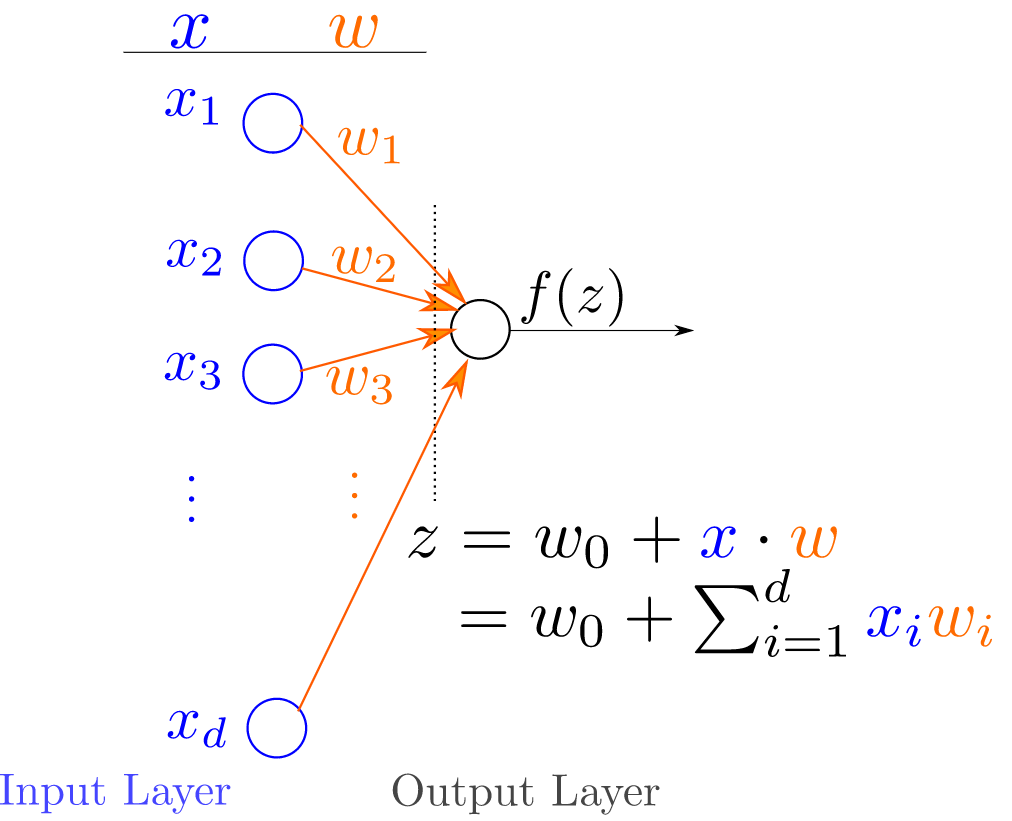

In [5]:
from IPython.display import Image

Image(r"C:\Users\ilsup\Google Drive\NoViews\Courses\MITx - Machine Learning with Python from Linear Models to Deep Learning\image-20200320184730545.png", width=400)


So as I understand this question you are asking which of the following are optimized during training (the others must have been optimized before that, or will remain as they were settled):

1. The dimension of the feature representation. As from the example above would be how many fi will I consider for the hidden layer
2. The weights that control the feature representation. The $w_{ij}$ that are used for xi to create the z
3. The hyper-parameters. Learning rate, number of hidden units/layers, etc.
4. The weights for the classifier. Thinking of the output layer as the classifier it would be like the θ for this classifier. Or, the weights that would accompany the fi for the last calculation (?)





#### Back Propagation


Back propagation is the mechanism through which the parameters of the NN are updated. It is simply a series of derivatives (chain rule), one after the other. We will do an example with a NN with a 1-dimensional $x$ made up of $L$ hidden layers, but each layer consists of only one unit, and each unit has activation function $f$.

In [2]:
from IPython.display import Image
Image(r"C:\Users\lucab\Google Drive\NoViews\Courses\MITx - Machine Learning with Python from Linear Models to Deep Learning\images_l7_p4.png", width=500)

FileNotFoundError: No such file or directory: 'C:\Users\lucab\Google Drive\NoViews\Courses\MITx - Machine Learning with Python from Linear Models to Deep Learning\images_l7_p4.png'

FileNotFoundError: No such file or directory: 'C:\Users\lucab\Google Drive\NoViews\Courses\MITx - Machine Learning with Python from Linear Models to Deep Learning\images_l7_p4.png'

<IPython.core.display.Image object>

with final loss defined as $\displaystyle  \displaystyle \mathcal{L}(y, f_ L) = (y - f_ L)^2$. The goal is to tune the parameters of the NN in order to minimize the loss function. For instance, for the first layer, the update rule will be:

$$w_1 \leftarrow w_1 - \eta \cdot \nabla _{w_1} \mathcal{L}(y, f_ L)$$

where 

$$z_1 = xw_1$$

$$\displaystyle \text {for } i=2\ldots L:\quad z_ i  = \displaystyle  f_{i-1} w_ i \quad \text {where }\,  f_{i-1} \, = \, f(z_{i-1}).$$

$$
\displaystyle \delta _ i = \frac{\partial \mathcal{L}}{\partial z_ i}
$$

Where $\eta$ be the learning rate for the stochastic gradient descent algorithm. The first step to updating any weight  w  is to calculate $\displaystyle \frac{\partial \mathcal{L}}{\partial w}$.

$$
\frac{\partial \mathcal{L}}{\partial w_1} = \frac{\partial z_1}{\partial w_1}\cdot \frac{\partial \mathcal{L}}{\partial z_1} = x \delta_1
$$

Then assume that $f$ is tge hyperbolic tangent:

$$f(x) = \tanh(x) \hspace{1cm}  f′(x)=(1−\tanh^2(x))$$

Which of the following option is the correct expression for $δ1$ in terms of $δ2$?

for the chain rule:

$$
\delta _1 = \frac{\partial f_1}{\partial z_1}\cdot \frac{\partial z_2}{\partial f_1}\cdot \frac{\partial \mathcal{L}}{\partial z_2}.$$

Since 

$$
\frac{\partial f_1}{\partial z_1} = (1 - f_1^2) \hspace{1cm} \text{and} \hspace{1cm} \frac{\partial z_2}{\partial f_1} = w_2
$$

Substituting the values of  $\frac{\partial f_1}{\partial z_1}, \frac{\partial z_2}{\partial f_1}$ into the main expression for $\delta_1$ we get:

$$
\delta _1 = (1 - f_1^2)\cdot w_2\cdot \frac{\partial \mathcal{L}}{\partial z_2} \, =\,  (1 - f_1^2)\cdot w_2\cdot \delta _2
$$

itera5ting recursively we get:

$$
\frac{\partial \mathcal{L}}{\partial w_1} = x (1-f_1^2)(1 - f_2^2)\cdots (1-f_{L}^2)w_2w_3\cdots w_ L(2(f_ L - y))$$

___


#### Recurrent Neural Network (RNN)

In recurrent neural networks (RNNs), we feed in a sequence of inputs, passing in the next entry in the input sequence and an output/structure of the RNN (usually a hidden state) into the RNN. So we partially feed the output of RNN back into itself for the next prediction. It is in this way that the RNN is "recurrent".

Backpropagation updates the internals of the RNN to maximize the separate components: hidden state, output, etc. (Different architectures have different components. One of the better "classic" models is the long short-term memory (LSTM) cell.)

RNN's learn the encoding into a feature vector, unlike feed-forward networks.

#### Convolutional Neural Networks (CNN)

Given an image, a standard feed forward neural network cannot recognize e.g. a mushroom of it is in a different position from the one in the train set. On top, the number of parameters would explode quickly. How can we solve it? 

Take an $(n \times n)$ filter going around the image; 

Multiple layers are passed, so that from the original image we will have $k$ $n \times n$ outputs, where $k$ is the number of filters applied

- Know the differences between feed-forward and Convolutional neural networks (CNNs).

- Implement the key parts in the CNNs, including **convolution** , **max pooling** units.

- Determine the dimension of each channel in different layers with a given CNNs.

- **CONVOLUTION**: A small squares rolls around the image and we apply the same parameters to all the patches (**shared weights**)

  > Let's suppose that we wish to classify images of $1000×1000$ dimensions. If we wish to pass the input through a feed-forward neural network with a single hidden layer made up of $1000×1000$ hidden units each of which is fully connected to the full image, we need $10^{12}$ connections / parameters ($1'000'000 × 1'000'000$); if instead we have convolutional layer with $1$ filter of shape $11×11$ instead, we need $121$ parameters.

  Remember that convolution is defines as:
  $$
  (f * g)(t) \equiv \int _{-\infty }^{+\infty } f(\tau )g(t-\tau )d\tau
  $$
  Here is a very cool [video](https://www.youtube.com/watch?v=N-zd-T17uiE) that explains it

**(MAX) POOLING**: in order to understand if an object *is* in the picture, regardless of *where* it is, we use pooling, i.e. we take the **maximum value** of each patch of the feature map


**Convolution** in 1 dimension. Given two 1 dim vectors, $g$ and $f$, keep one still, flip the other one ($g'$) and make it slide one step at a time; then multiply each corresponding element of the vector for every step and sum everything.

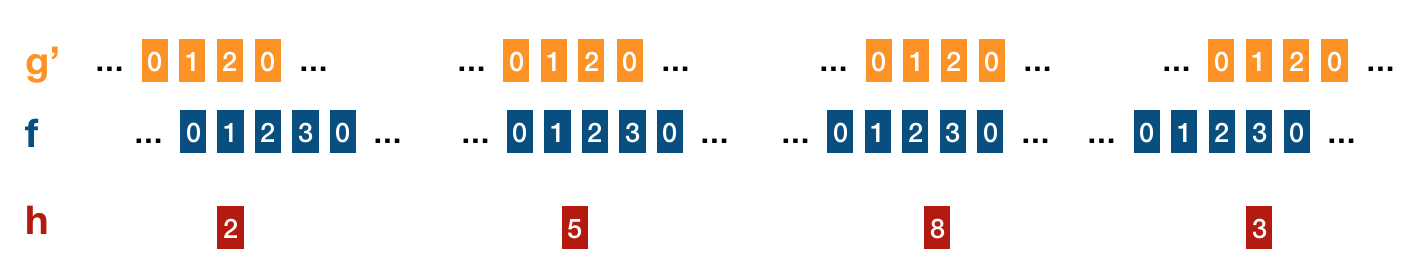

In [4]:
from IPython.display import Image

Image(r"C:\Users\ilsup\Google Drive\NoViews\Courses\MITx - Machine Learning with Python from Linear Models to Deep Learning\images_L12_cov_example.png", width=800)

If we put zero where the value in the convolution is not defined is called **zero-padding**; Without zero padding means performing the operations only where both vectors are defined. 

With Matrixes, applying the convolutional filter $g'$ to $f$ we obtain C, whose sum is 15.

$$
f = \begin{bmatrix}  1 &  2 &  1 \\ 2 &  1 &  1 \\ 1 &  1 &  1 \end{bmatrix} \hspace{1cm} g' = \begin{bmatrix}  1 &  0.5 \\ 0.5 &  1 \end{bmatrix} \hspace{1cm} C = \begin{bmatrix}  4 &  4 \\ 4 &  3 \end{bmatrix}
$$


*stride: how many pixel the filter moves at each step
___

### Unsupervised Learning

- Understand the definition of *clustering*
- Understand *clustering cost* with different similarity measures
- Understand the *K-means* algorithm

A *partition* of a set is a grouping of the set's elements into non-empty subsets, in such a way that **every** element is included in one and only one of the subsets. In other words, $C_1,C_2,...,C_K$ is a partition of ${1,2,...,n}$ if and only if
$$
C_1 \cup C_2 \cup ... \cup C_ K = \big \{  1, 2, ..., n \big \}\\C_ i \cap C_ j = \emptyset \quad \text {for any $i \neq j$ in $\big \{ 1, ..., k\big \} $ }
$$

The cost of each cluster is defined as the sum of the cost of each cluster 

- it can be the diameter of the cluster

- the average distance between the points 

- Or the **distance from a *representative* $z$**:
$$
\text{Cost}(C, z) = \sum_{i \in C} \text{dist}(x^{(i)}, z)
$$
and $\text{dist}$ is a certain form of distance between vectors. In our case we can use **cosine similarity** (i.e. the dot product of two vectors over the product of the two norms; it is not sensitive to the magnitude of the vectors)
$$
{\displaystyle {\text{similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}}
$$
Another way of measuring vector's similarity could have also been **Euclidean squared distance**:
$$
\|\mathbf{A}-\mathbf {B} \|^2
$$
We will use this last definition and we will define the full cost of the $k$ clusters given the $k$ representatives as:
$$
\text{Cost}(C_1, \dotso, C_k, z^{(1)}, \dotso, z^{(k)}) = \sum_{j = 1}^{k} \sum_{i \in C} \|x^{(i)}-z^{(i)}\|^2
$$



#### K-means Clustering

How, given the cost definition, we can find the best partition? Here is the algorithm:

1. Randomly select $k$ representatives $z^{(1)} \dots z^{(k)}$

2. Iterate

    1. Given $z_1,\dots,z_K$ assign each data point $x^{(i)}$ to the closest $z_j$, so that

    $$
    \text {Cost}(z_1, ... z_ K) = \sum _{i=1}^{n} \min _{j=1,...,K} \left\|  x^{(i)} - z_ j \right\| ^2
    $$

    2. Given $C_1, \dots , C_K$ find the best representatives $z_1,...,z_K$ i.e. find them such that

    $$
    \displaystyle z_ j=\operatorname {argmin}_{z} \sum _{i \in C_ j} \| x^{(i)} - z \| ^2.
    $$

Given some points belonging to a cluster, how do we find the representative that minimize the squared Euclidean distance? First we compute the gradient:

$$
\nabla _{z_ j}\left(\sum _{i \in \mathbb {C}_ j} \| x^{(i)} - z_ j\| ^2\right).
$$

Obtaining:

$$
\displaystyle \sum _{i \in \mathbb {C}_ j} -2(x^{(i)} - z_ j)
$$

setting it to zero we obtain: 

$$
\displaystyle z_j = \frac{\sum _{i \in C_ j} x^{(i)}}{|C_ j|}
$$

where $|C_ j|$ is the size of $C_j$; 

- Of course, it is not guaranteed (and most of the times not the case) that the $K$ representatives $z_1,...,z_K \in {x_1,...,x_n}$
- The result of clustering **depends** on the initialization of $z_1,...,z_K$
- Imagine two normal distributions, different mean and same variance: in this case, the K-means clustering will yield the right clusters; **but when $\sigma_1 >>\sigma_2$, the boundary between the 2 optimal clusters is closer to one centroid then the other. Since the 2-means algorithm will always have an equidistant split between the two centroids, this behavior cannot be reproduced and thus k-means clustering will erroneoously assign more points to the cluster with a smaller variance.**

#### K-Medoids

How, given the cost definition, we can find the best partition? Here is the algorithm:

1. Randomly select $k$ representatives $\big \{  z_1, ..., z_ K \big \}  \subseteq \big \{  x_1, ..., x_ n \big \}$

2. Iterate

   1. Given $z_1,\dots,z_K$ assign each data point $x^{(i)}$ to the closest $z_j$, so that

   $$
   \text {Cost}(z_1, ... z_ K) = \sum _{i=1}^{n} \min _{j=1,...,k} \text {dist}(x^{(i)}, z_ j)
   $$

   2. Given $C_1, \dots , C_K$ find the best representatives $z_1,...,z_K$ i.e. find them such that

   $$
   \sum _{x^{(i)} \in C_ j} \text {dist}(x^{(i)}, z_ j)
   $$

   is minimal. 

**K-means**: In step 2.A, we go through each of the $n$ $x_i$, and iterate through each of the $k$ $z_j$'s for each $x_i$ (to find the closest $z_j$). This iteration is $\mathcal{O}(nK)$. And because each $x_i$ has length $d$, the total iteration is $\mathcal{O}(ndK)$. Step 2.B is similar, so the order of complexity remains the same.

**K-medoids**: Note that step 2.A of the K-Medoids is the same as that of K-Means, so the time complexity is $\mathcal{O}(ndK)$. Note that step 2.B of K-Medoids has an additional loop of iterating through the $n$ points $z_j \in {x_1,...,x_n}$ which takes $\mathcal{O}(n)$. Thus step 2.2 takes $\mathcal{O}(n^2dK)$.


### Generative Models

Generative models model the probability distribution of each class. We will see two kind of models: **Multinomial** and **Gaussian**, and we have to answer to two order of questions: how to **estimate** the models and how to **predict** using these models. 

##### Multinomial Models

Let's take the case of documents production. In the multinomial case we want to find the probability that a certain word is chosen given the parametrization $\theta$ of the model:

$$
\text{Prob}(w\vert \theta) = \theta_w
$$

Given that $\theta_w \geq 0$ and that all the $\theta_w$s sum to one. For a document where words are independently 
generated the **likelihood of the document** is:

$$
\text{Prob}(\text{Doc} \vert \theta) = \prod_{i=1}^n \theta_{w_i} = \prod_{w \in W} \theta_w^{\text{count w}}
$$

The probability of a document is the product of the appearance of each word, i.e. the product of each word at the power of the number of the word's appearances in the document. What we want to do is to maximize the probability of the word being generated "moving" $\theta$.

$$
\max_{\theta} \prod_{w \in W} \theta_w^{\text{count w}}
$$

Taking the log it yields:

$$
\sum_{w \in W} \text{count}(w) \log(\theta_w)
$$

Taking the derivative and setting to zero we get:

$$
\tilde{\theta}_w = \frac{\text{count}(w)}{\sum_{w\prime \in W} \text{count}(w \prime) }
$$

For a dictionary with more than 2 words we get this result by applying Lagrangian Multipliers ([check here](https://courses.edx.org/courses/course-v1:MITx+6.86x+1T2020/courseware/unit_4/lec15_gm/?activate_block_id=block-v1%3AMITx%2B6.86x%2B1T2020%2Btype%40sequential%2Bblock%40lec15_gm])). 

Consider using a multinomial generative model $M$ for the task of binary classification consisting of two classes which are denoted by + (positive class) and - (negative class). Let the parameters of $M$ that maximize the likelihood of training data for the positive class be denoted by $\theta^+$ and for the negative class be denoted by $\theta^-$.

Also, suppose that we classify a new document $D$ to belong to the positive class if and only if

$$
\log \frac{P(D | \theta ^+)}{P(D | \theta ^-)} \ge 0
$$

Which becomes:

$$
\sum_{w \in W} \text{count}(w) \log \frac{\theta^+}{\theta^-} = \sum_{w \in W} \text{count}(w) \tilde{\theta}
$$

And we can see that the formula has the same form of a **linear classifier that goes through the origin**. Now we may want to inject some conditionality on the words flow. 

$$
\text{Prob}(y=+ \vert D) = \frac{\text{Prob}(D \vert \theta^+)\text{Prob}(y=+)}{\text{Prob}(D)}
$$

Probability that I assign $+$ given a document $D$ follows Bayes rule. $\text{Prob}(y=+)$ is the prior. Hence:

$$
\log \frac{P(y=+|D)}{P(y=-|D)} = \log \frac{\text{Prob}(D \vert \theta^+)\text{Prob}(y=+)}{\text{Prob}(D \vert \theta^-)\text{Prob}(y=-)}
$$

Where ${\text{Prob}(D)}$ cancels out. 

$$
\log \frac{\text{Prob}(D \vert \theta^+)}{\text{Prob}(D \vert \theta^-)} \log \frac{\text{Prob}(y=+)}{\text{Prob}(y=-)}
$$

If we substitute $\log \frac{\text{Prob}(y=+)}{\text{Prob}(y=-)}$ with $\theta_0$ we get

$$
\sum_{w \in W} \text{count}(w) \log \frac{\theta^+}{\theta^-}  + \theta_0= \sum_{w \in W} \text{count}(w) \tilde{\theta} + \theta_0
$$

And we can see that the formula has the same form of a **linear classifier with an offset parameter**, where the offset parameter is the log of the ratio of our priors. 

##### Gaussian Generative Models

A random vector $\mathbf{X}=(X^{(1)},\ldots ,X^{(d)})^ T\,$ is a **Gaussian vector**, or **multivariate Gaussian or normal variable** , if any linear combination of its components is a (univariate) Gaussian variable or a constant (a “Gaussian" variable with zero variance), i.e., if $\alpha^TX$ is (univariate) Gaussian or constant for any constant non-zero vector $\alpha \in R^d$. The distribution of $\mathbf{X}$, is completely specified by the vector mean $\mu =\mathbf E[\mathbf{X}]= (\mathbf E[X^{(1)}],\ldots ,\mathbf E[X^{(d)}])^ T$ and the $d×d$ covariance matrix $\Sigma$. If it is invertible, then the pdf of $\mathbf{X}$ is:
$$
\displaystyle  \displaystyle f_{\mathbf{X}}(\mathbf x) = \frac{1}{\sqrt{\left(2\pi \right)^ d \text {det}(\Sigma )}}e^{-\frac{1}{2}(\mathbf x-\mu )^ T \Sigma ^{-1} (\mathbf x-\mu )}, ~ ~ ~ \mathbf x\in \mathbb {R}^ d
$$
where $\text {det}(\Sigma )$ is the determinant of the $\Sigma$, which is positive when $\Sigma$ is invertible. If $\mu=0$ and $\Sigma $ is the identity matrix, then it is called a **standard normal random vector**.

Recall that the **likelihood** of $x$ being generated from a multi-dimensional Gaussian with **all same mean** $\mu$ and all the components being uncorrelated and having the same standard deviation $\sigma$ is:
$$
P(x | \mu , \sigma ^2) = \frac{1}{(2\pi \sigma ^2)^{d/2}} \text {exp}(-\frac{1}{2\sigma ^2} \|  x - \mu \| ^2)
$$
As expected, the result of the MLE for mean and variance is respectively (remember that the random variables have same mean and same variance)
$$
\hat{\mu } = \frac{\sum _{t=1}^{n} x^{(t)}}{n}\\\hat{\sigma }^2 = \frac{\sum _{t=1}^ n \| x^{(t)} - \mu \| ^2}{nd}
$$

##### Gaussian Mixture Models

It is a generative model for data $x\in R_d$ is defined by the following set of parameters:

1. $K$: Number of mixture components
2. A $d$-dimensional Gaussian $\mathcal{N}(\mu ^{(j)}, \sigma _ j^2)$ for every $j=1,\dots,K$
3. $p_1,…,p_K$ Mixture weights

Let all of the parameters of the Gaussian mixture model be collectively represented as:
$$
\theta = \left\{ p_1, \dots , p_ K, \mu ^{(1)}, \dots , \mu ^{(K)}, \sigma _1^2, \dots , \sigma _ K^2\right\}
$$
The **likelihood** of a point x in a GMM is given as
$$
\displaystyle  p(\mathbf{x} \mid \theta ) = \sum _{j = 1}^ K p_ j \mathcal{N}(\mathbf{x},\mu ^{(j)}, \sigma _ j^2).
$$
Let $x$ be an observation obtained from the Gaussian mixture model in the following way:

1. We draw which gaussian we will use according to the probabilities $p_1, \dots, p_k$
2. We draw from the selected Gaussian $X \sim N(\mu^{(j)}, \sigma_j^2)$

##### EM (Expectation Maximization) Algorithm

While a “hard" clustering algorithm like k-means or k-medoids can only provide a cluster ID for each data point, the EM algorithm, along with the generative model driving its equations, can provide the posterior probability (“soft" assignments) that every data point belongs to any cluster.


**Process** (two gaussians)
- Start with two randomly placed gaussians $\mathcal{N_1}(\mu_1, \sigma _1^2), \mathcal{N_2}(\mu_2, \sigma _ 2^2)$
- For each point: does it look like it came from $\mathcal{N_1}$ or $\mathcal{N_2}$?
- Adjust parameters of $\mathcal{N_1}(\mu_1, \sigma _1^2)$ and $\mathcal{N_2}(\mu_2, \sigma _2^2)$ to fit points assigned to them

We observe $n$ data points $x_1,…,x_n$ in $R_d$. We wish to maximize the GMM likelihood with respect to the parameter set $\theta = \left\{ p_1, \dots , p_ K, \mu ^{(1)}, \dots , \mu ^{(K)}, \sigma _1^2, \dots , \sigma _ K^2\right\}$.

Maximizing the log-likelihood $\log (\prod _{i=1}^ n p(\mathbf x^{(i)} | \theta ))$ is not tractable in the setting of GMMs. There is no closed-form solution to finding the parameter set $\theta$ that maximizes the likelihood. The *EM algorithm* is an iterative algorithm that finds a locally optimal solution $\tilde{\theta}$ to the GMM likelihood maximization problem.

**Initialization**: as for the initialization before the first time E step is carried out, we can either do a random initialization of the parameter set $\theta$ (or we can employ k-means to find the initial cluster centers of the K clusters and use the global variance of the dataset as the initial variance of all the K clusters. In the latter case, the mixture weights can be initialized to the proportion of data points in the clusters as found by the k-means algorithm).

**E Step**: it involves finding the posterior probability that point $x^{(i)}$ was generated by cluster $j$, for every $i=1,…,n$ and $j=1,…,K$. This step assumes the knowledge of the parameter set $\theta $. We find the posterior using the following equation:
$$
\displaystyle  p(\text {point }\mathbf x^{(i)}\text { was generated by cluster }j | \mathbf x^{(i)}, \theta ) \triangleq p(j \mid i) = \frac{p_ j \mathcal{N}\left(\mathbf x^{(i)}; \mu ^{(j)},\sigma _ j^2 I\right)}{p(\mathbf x^{(i)} \mid \theta )}.
$$

**M Step**: The step maximizes a proxy function $\hat{ℓ}(x(1),…,x(n)∣\theta)$ of the log-likelihood over $\theta$, where
$$
\displaystyle  \hat{\ell }(\mathbf x^{(1)},\dots ,\mathbf x^{(n)} \mid \theta ) \triangleq \sum _{i=1}^{n} \sum _{j = 1}^ K p(j \mid i) \log \left( \frac{p\left( \mathbf x^{(i)} \text { and } \mathbf x^{(i)} \text { generated by cluster }j \mid \theta \right)}{p(j \mid i)} \right).
$$
This is done instead of maximizing over $\theta$ the actual log-likelihood
$$
\displaystyle  \ell (\mathbf x^{(1)},\dots ,\mathbf x^{(n)} \mid \theta ) = \sum _{i=1}^{n} \log \left[\sum _{j = 1}^ K p\left( \mathbf x^{(i)} \text { generated by cluster }j \mid \theta \right)\right].
$$
Maximizing the proxy function over the parameter set $\theta$, one can verify by taking derivatives and setting them equal to zero that


$$
\displaystyle \displaystyle  \widehat{\mu ^{(j)}}= \frac{\sum _{i = 1}^ n p (j \mid i) \mathbf x^{(i)}}{\sum _{i=1}^ n p(j \mid i)}\\\displaystyle \displaystyle  \widehat{p _j}= \frac{1}{n}\sum _{i = 1}^ n p(j \mid i),\\\displaystyle \displaystyle \widehat{\sigma _ j^2}= \frac{\sum _{i = 1}^ n p(j \mid i) \|  \mathbf x^{(i)} - \widehat{\mu ^{(j)}} \| ^2}{d \sum _{i = 1}^ n p(j \mid i)}.
$$
The E and M steps are repeated iteratively until there is no noticeable change in the actual likelihood computed after M step using the newly estimated parameters or if the parameters do not vary by much.




A **Markov decision process (MDP)** is defined by

- a set of states $s\in S$;
- a set of actions $a \in A$;
- Action dependent transition probabilities $T(s,a,s')=P(s'|s, a)$, so that for each state $s$ and action $a$, $\displaystyle \sum _{s'\in S} T(s,a,s')=1$.
- Reward functions $R(s,a,s′)$, representing the reward for starting in state $s$, taking action $a$ and ending up in state $s′$ after one step. (The reward function may also depend only on $s$, or only $s$ and $a$.)

MDPs depends on all the fourth quantities. MDPs also satisfy the **Markov property** in that the transition probabilities and rewards depend only on the current state and action, and remain unchanged regardless of the history (i.e. past states and actions) that leads to the current state.

#### Utility Functions

- **Final horizon** utility: $\text{U}(s_o, \dots, s_{n+k}) = \text{U}(s_o, \dots, s_{n})$, i.e. utility is calculated up to step $n$, then is stays the same till the last step $k$. This definition of utility though invalidates the dependency of decisions only on the current states; decision will also depend on "timing", i.e. if I have only one step to I will be pushed to behave in a riskier way. 

- **Discounted reward** utility: $U[s_0,s_1,\ldots ]= \sum _{k=0}^{\infty } \gamma ^ k R(s_ k).$ This means that we discount rewards by a factor $\gamma$. This kind of utility is bounded to:
  $$
  U[s_0,s_1,\ldots ]= \sum _{k=0}^{\infty } \gamma ^ k R(s_ k) \leq  \sum _{k=0}^{\infty } \gamma ^ k R_{\text{max}} \leq R_{\text{max}} \frac{1}{1 - \gamma} \text {where }0\leq \gamma <1.
  $$

#### Policy

Given an MDP, and a utility function $\text{U}[s_0,s_1,…,s_n]$ our goal is to find an optimal policy function that maximizes the expectation of the utility. Here, a **policy** is a function $\pi :S \rightarrow A$ that assigns an action $\pi(s)$ to any state $s$. We denote the optimal policy by $\pi^*$.

#### Bellman Equations

- We then have the optimal policy $\pi^*$ defined above

- We define the **value function** $V^*(s)$ the expected reward at $s$ acting optimally 

- Then, we then define the **Q-function** $Q^∗(s,a)$ as the expected reward from starting at state $s$, then acting with action $a$, and acting optimally afterwards.

  The **Bellman equations** put these three definitions together:
  
  $$
  V^*(s) = \displaystyle  \displaystyle \max _ a Q^*(s, a) = Q^*(s, \pi^*(s))\\
  \displaystyle Q^*(s, a) = \displaystyle  \sum _{s'} T(s, a, s') (R(s, a, s') + \gamma V^*(s') )\\
  V^*(s) = \displaystyle  \displaystyle \max _ a \bigg[ \sum _{s'} T(s, a, s') (R(s, a, s') + \gamma V^*(s'))\bigg]
  \\
  V^*(s) = \displaystyle  \displaystyle \max _ a \bigg[ \sum _{s'} T(s, a, s') (R(s, a, s') + \gamma \max _ a Q^*(s', a') \bigg]
  $$

The first equation means: select the set of actions that gives me the higher $Q$. The second equation means: the optimal $Q$ depends on the next step reward (weighted by its particular states with transition function) plus the optima value function discounted. 

If we consider the value function as the optimal reward function after $k$ steps, the  last equation becomes:
$$
V^*_{k+1}(s) = \displaystyle  \displaystyle \max _ a \bigg[ \sum _{s'} T(s, a, s') (R(s, a, s') + \gamma V^*_k(s'))\bigg]
$$
And, as $k$ goes to $\infty$,  $V^*_k(s)$ is supposed to converge to $V^*(s)$

1. Initialization of the algorithm with $V^*_0(i)=0$ for every $i$
2. Iterate until $V^*_k(s)= V^*_{k+1}(s)$ for every $s$



In the real world, usually we know the actions and the states, but not the **transition probabilities** and the **rewards** which are **unknown**.  Then we should try to estimate transition probabilities:
$$
\displaystyle \displaystyle  \hat{T} =  \frac{\text {count}(s, a, s')}{\displaystyle \sum _{s'} \text {count}(s, a, s')}
$$

$$
\displaystyle \hat{R} = \frac{\displaystyle \sum _{t=1}^{\text {count}(s, a, s')} R_ t(s, a, s')}{\text {count}(s, a, s')}
$$

The issue with this approach (called **model based** approach) is that certain states might not be visited at all while collecting the statistics, or certain states might be visited much less often than others leading to very noisy estimates. We then try to use another approach (**model free** approach) which, instead of estimating the probability of an even occurring, simply adds up the outcomes and divides by the number of trials:
$$
\displaystyle \frac{\sum _{i=1}^ K f(X_ i)}{K}
$$
**Sampling Based Approach for Q-learning**

We decide to run different trials to estimate our $Q$:
$$
\displaystyle \text{sample}_1 = R(s, a, s'_1) + \gamma \max _ a Q^*(s'_1, a)\\ \vdots \\	
\displaystyle \text{sample}_k = R(s, a, s'_k) + \gamma \max _ a Q^*(s'_k, a)
$$
Instead of taking a normal average of all the $k$ samples, we take an exponential running average. The algorithm becomes:

1. Initializing $Q(s, a)$ with zero $\forall s, a$

2. Iterate until convergence:

   1. collect sample $s, a, s'$ and $R(s, a, s')$

   2. $Q_{i+1}(s) = \displaystyle \alpha (R(s, a, s'_i) + \gamma \max _ a Q^*(s'_i, a))+ (1-\alpha)Q_i(s, a)$

      $Q_{i+1}(s) = Q_i(s, a) + \alpha (R(s, a, s'_i) + \gamma \max _ a Q^*(s'_i, a)-Q_i(s,a))$

The second formula in step 2.2 is similar to the gradient descend one, and convergence can be demonstrated starting from there. 

**Exploration vs Exploitation**